<a href="https://colab.research.google.com/github/Keshavj022/Cat_vs_Dog_prediction/blob/main/Cat_VS_Dog_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

Configuring the path of kaggle.json file

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing the Dog vs Cat dataset from kaggle

In [5]:
!kaggle competitions download -c dogs-vs-cats

100% 809M/812M [00:12<00:00, 71.7MB/s]
100% 812M/812M [00:12<00:00, 69.9MB/s]


Extracting the compressed dataset

In [6]:
from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Dataset Sucessfully extracted")

Dataset Sucessfully extracted


In [7]:
from zipfile import ZipFile
dataset = '/content/test1.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Test Dataset Sucessfully extracted")

Test Dataset Sucessfully extracted


In [8]:
from zipfile import ZipFile
dataset = '/content/train.zip'
with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("Train Dataset Sucessfully extracted")

Train Dataset Sucessfully extracted


counting the number of files in train and test folder

In [9]:
import os
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print("Number of images in training dataset are: ", file_count)

Number of images in training dataset are:  25000


In [10]:
path, dirs, files = next(os.walk('/content/test1'))
file_count = len(files)
print("Number of images in test dataset are: ", file_count)

Number of images in test dataset are:  12500


printing the name of images

In [11]:
file_names = os.listdir('/content/train')
print(file_names)

['dog.4198.jpg', 'cat.11187.jpg', 'dog.11071.jpg', 'cat.10611.jpg', 'cat.3869.jpg', 'dog.4989.jpg', 'dog.4242.jpg', 'dog.1823.jpg', 'cat.10025.jpg', 'cat.4632.jpg', 'cat.8000.jpg', 'cat.4907.jpg', 'cat.9772.jpg', 'cat.8579.jpg', 'dog.11878.jpg', 'dog.1420.jpg', 'cat.12361.jpg', 'dog.4709.jpg', 'cat.1461.jpg', 'cat.3630.jpg', 'dog.11412.jpg', 'dog.6205.jpg', 'cat.1677.jpg', 'cat.8385.jpg', 'dog.6362.jpg', 'dog.8083.jpg', 'cat.10587.jpg', 'cat.2975.jpg', 'cat.9456.jpg', 'cat.2188.jpg', 'cat.1482.jpg', 'dog.9451.jpg', 'dog.6112.jpg', 'dog.3815.jpg', 'dog.5260.jpg', 'dog.2550.jpg', 'dog.10613.jpg', 'dog.7129.jpg', 'dog.11243.jpg', 'cat.8137.jpg', 'cat.7894.jpg', 'cat.1258.jpg', 'cat.106.jpg', 'dog.4867.jpg', 'cat.7543.jpg', 'cat.8978.jpg', 'dog.1191.jpg', 'dog.887.jpg', 'dog.11414.jpg', 'dog.8586.jpg', 'cat.3022.jpg', 'cat.9178.jpg', 'cat.8807.jpg', 'dog.5471.jpg', 'cat.7032.jpg', 'dog.1367.jpg', 'cat.5285.jpg', 'dog.10232.jpg', 'dog.4708.jpg', 'dog.5726.jpg', 'cat.9642.jpg', 'cat.2821.jpg

Importing the libraries

In [12]:
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of dogs and cats

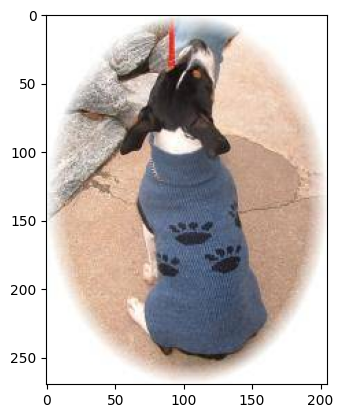

In [13]:
#displaying the dog image
img = mpimg.imread('/content/train/dog.4198.jpg')
imgplt = plt.imshow(img)
plt.show()

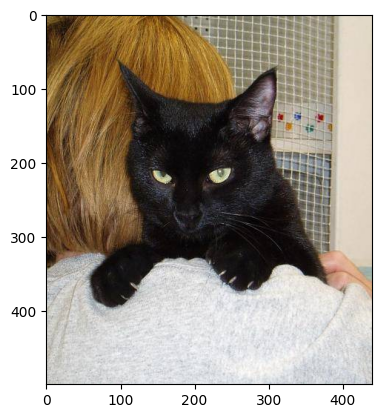

In [14]:
#displaying the cat image
img = mpimg.imread('/content/train/cat.11187.jpg')
imgplt = plt.imshow(img)
plt.show()

Resizing all the images

In [15]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1
print("Number of Dog images : ", dog_count)
print("Number of Cat images : ", cat_count)

Number of Dog images :  12500
Number of Cat images :  12500


Resizing all the images

In [16]:
os.mkdir('/content/image resized')

In [19]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'
for i in range(2000):
  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename
  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')
  newImgPath = resized_folder+filename
  img.save(newImgPath)

Resized image of dog and cat

In [20]:
file_names = os.listdir('/content/image resized')
print(file_names)

['dog.4198.jpg', 'cat.11187.jpg', 'dog.11071.jpg', 'cat.10611.jpg', 'cat.3869.jpg', 'dog.4989.jpg', 'dog.4242.jpg', 'dog.1823.jpg', 'cat.10025.jpg', 'cat.4632.jpg', 'cat.8000.jpg', 'cat.4907.jpg', 'cat.9772.jpg', 'cat.8579.jpg', 'dog.11878.jpg', 'dog.1420.jpg', 'cat.12361.jpg', 'dog.4709.jpg', 'cat.1461.jpg', 'cat.3630.jpg', 'dog.11412.jpg', 'dog.6205.jpg', 'cat.1677.jpg', 'cat.8385.jpg', 'dog.6362.jpg', 'dog.8083.jpg', 'cat.10587.jpg', 'cat.2975.jpg', 'cat.9456.jpg', 'cat.2188.jpg', 'cat.1482.jpg', 'dog.9451.jpg', 'dog.6112.jpg', 'dog.3815.jpg', 'dog.5260.jpg', 'dog.2550.jpg', 'dog.10613.jpg', 'dog.7129.jpg', 'dog.11243.jpg', 'cat.8137.jpg', 'cat.7894.jpg', 'cat.1258.jpg', 'cat.106.jpg', 'dog.4867.jpg', 'cat.7543.jpg', 'cat.8978.jpg', 'dog.1191.jpg', 'dog.887.jpg', 'dog.11414.jpg', 'dog.8586.jpg', 'cat.3022.jpg', 'cat.9178.jpg', 'cat.8807.jpg', 'dog.5471.jpg', 'cat.7032.jpg', 'dog.1367.jpg', 'cat.5285.jpg', 'dog.10232.jpg', 'dog.4708.jpg', 'dog.5726.jpg', 'cat.9642.jpg', 'cat.2821.jpg

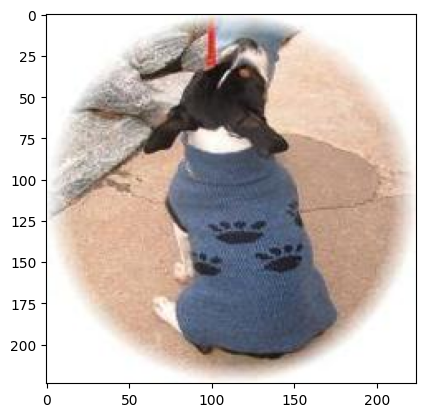

In [21]:
img = mpimg.imread('/content/image resized/dog.4198.jpg')
imgplt = plt.imshow(img)
plt.show()

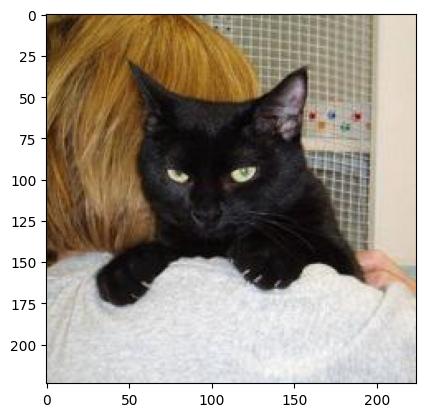

In [22]:
img = mpimg.imread('/content/image resized/cat.11187.jpg')
imgplt = plt.imshow(img)
plt.show()

Creating labels for resized images for dogs and cats

cat --> 1

dog --> 0

In [23]:
filenames = os.listdir('/content/image resized')
labels = []
for i in range(2000):
  file_name = filenames[i]
  label = file_name[0:3]
  if label == 'cat':
    labels.append(1)
  else:
    labels.append(0)

In [24]:
print(filenames[0:5])
print(labels[0:5])

['dog.4198.jpg', 'cat.11187.jpg', 'dog.11071.jpg', 'cat.10611.jpg', 'cat.3869.jpg']
[0, 1, 0, 1, 1]


In [25]:
file_names = os.listdir('/content/image resized')
dog_count = 0
cat_count = 0

for img_file in file_names:
  name = img_file[0:3]
  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1
print("Number of Dog images : ", dog_count)
print("Number of Cat images : ", cat_count)

Number of Dog images :  975
Number of Cat images :  1025


In [26]:
values, counts = np.unique(labels, return_counts = True)
print(values)
print(counts)

[0 1]
[ 975 1025]


Converting all the resized images to numpy arrays

In [27]:
import cv2
import glob

In [28]:
image_directory = '/content/image resized/'
image_extension = ['png', 'jpg']
files =[]
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [30]:
print(dog_cat_images)
print(type(dog_cat_images))

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 72 113 135]
   [ 68 111 132]
   [ 62 109 130]
   ...
   [200 216 228]
   [200 216 228]
   [200 216 228]]

  [[ 71 112 134]
   [ 68 111 132]
   [ 62 109 130]
   ...
   [200 216 228]
   [200 216 228]
   [200 216 228]]

  [[ 65 103 127]
   [ 63 104 127]
   [ 58 102 125]
   ...
   [200 216 228]
   [200 216 228]
   [200 216

In [31]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [32]:
X = dog_cat_images
Y = np.asarray(labels)

Train Test Split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state = 3)

In [35]:
X.shape

(2000, 224, 224, 3)

In [36]:
X_train.shape

(1600, 224, 224, 3)

In [37]:
Y.shape

(2000,)

In [38]:
Y_train.shape

(1600,)

In [39]:
X_test.shape

(400, 224, 224, 3)

In [40]:
Y_test.shape

(400,)

Scaling the data

In [41]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [42]:
print(X_train_scaled)
print(X_test_scaled)

[[[[0.7372549  0.84313725 0.89803922]
   [0.59607843 0.70196078 0.75686275]
   [0.52941176 0.63529412 0.69019608]
   ...
   [0.51764706 0.65882353 0.72156863]
   [0.49411765 0.61568627 0.70588235]
   [0.48627451 0.60392157 0.70196078]]

  [[0.71764706 0.82352941 0.87843137]
   [0.59607843 0.70196078 0.75686275]
   [0.54901961 0.65490196 0.70980392]
   ...
   [0.49019608 0.63529412 0.69019608]
   [0.48627451 0.60784314 0.69019608]
   [0.49803922 0.61960784 0.70980392]]

  [[0.67843137 0.79607843 0.83921569]
   [0.59215686 0.70980392 0.75294118]
   [0.57254902 0.68235294 0.7254902 ]
   ...
   [0.44313725 0.59215686 0.63921569]
   [0.45882353 0.58823529 0.65098039]
   [0.49803922 0.62352941 0.69803922]]

  ...

  [[0.41176471 0.4        0.43529412]
   [0.47058824 0.45882353 0.49411765]
   [0.5254902  0.51372549 0.54901961]
   ...
   [0.7254902  0.78823529 0.83921569]
   [0.74117647 0.80392157 0.85490196]
   [0.80392157 0.86666667 0.91764706]]

  [[0.39215686 0.38823529 0.42352941]
   [0.4

Building the Neural Network

In [43]:
import tensorflow as tf
import tensorflow_hub as hub

In [44]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model = hub.KerasLayer(mobilenet_model, input_shape = (224,224,3), trainable=False)

In [45]:
num_of_classes = 2
model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [46]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics = ['acc']
)

In [48]:
model.fit(X_train_scaled, Y_train, epochs = 8)

Epoch 1/8
50/50 [==============================] - 42s 841ms/step - loss: 0.0334 - acc: 0.9881
Epoch 2/8
50/50 [==============================] - 46s 907ms/step - loss: 0.0304 - acc: 0.9900
Epoch 3/8
50/50 [==============================] - 52s 1s/step - loss: 0.0251 - acc: 0.9944
Epoch 4/8
50/50 [==============================] - 45s 895ms/step - loss: 0.0236 - acc: 0.9950
Epoch 5/8
50/50 [==============================] - 43s 853ms/step - loss: 0.0203 - acc: 0.9950
Epoch 6/8
50/50 [==============================] - 45s 903ms/step - loss: 0.0171 - acc: 0.9975
Epoch 7/8
50/50 [==============================] - 52s 1s/step - loss: 0.0157 - acc: 0.9981
Epoch 8/8
50/50 [==============================] - 46s 926ms/step - loss: 0.0147 - acc: 0.9987


In [49]:
score , acc = model.evaluate(X_test_scaled, Y_test)
print("Test loss = ", score)
print("Test Accuracy = ", acc)

13/13 [==============================] - 13s 1s/step - loss: 0.0505 - acc: 0.9750
Test loss =  0.05046311393380165
Test Accuracy =  0.9750000238418579


Predictive System

Path of image to be predicted/content/cat.jpg


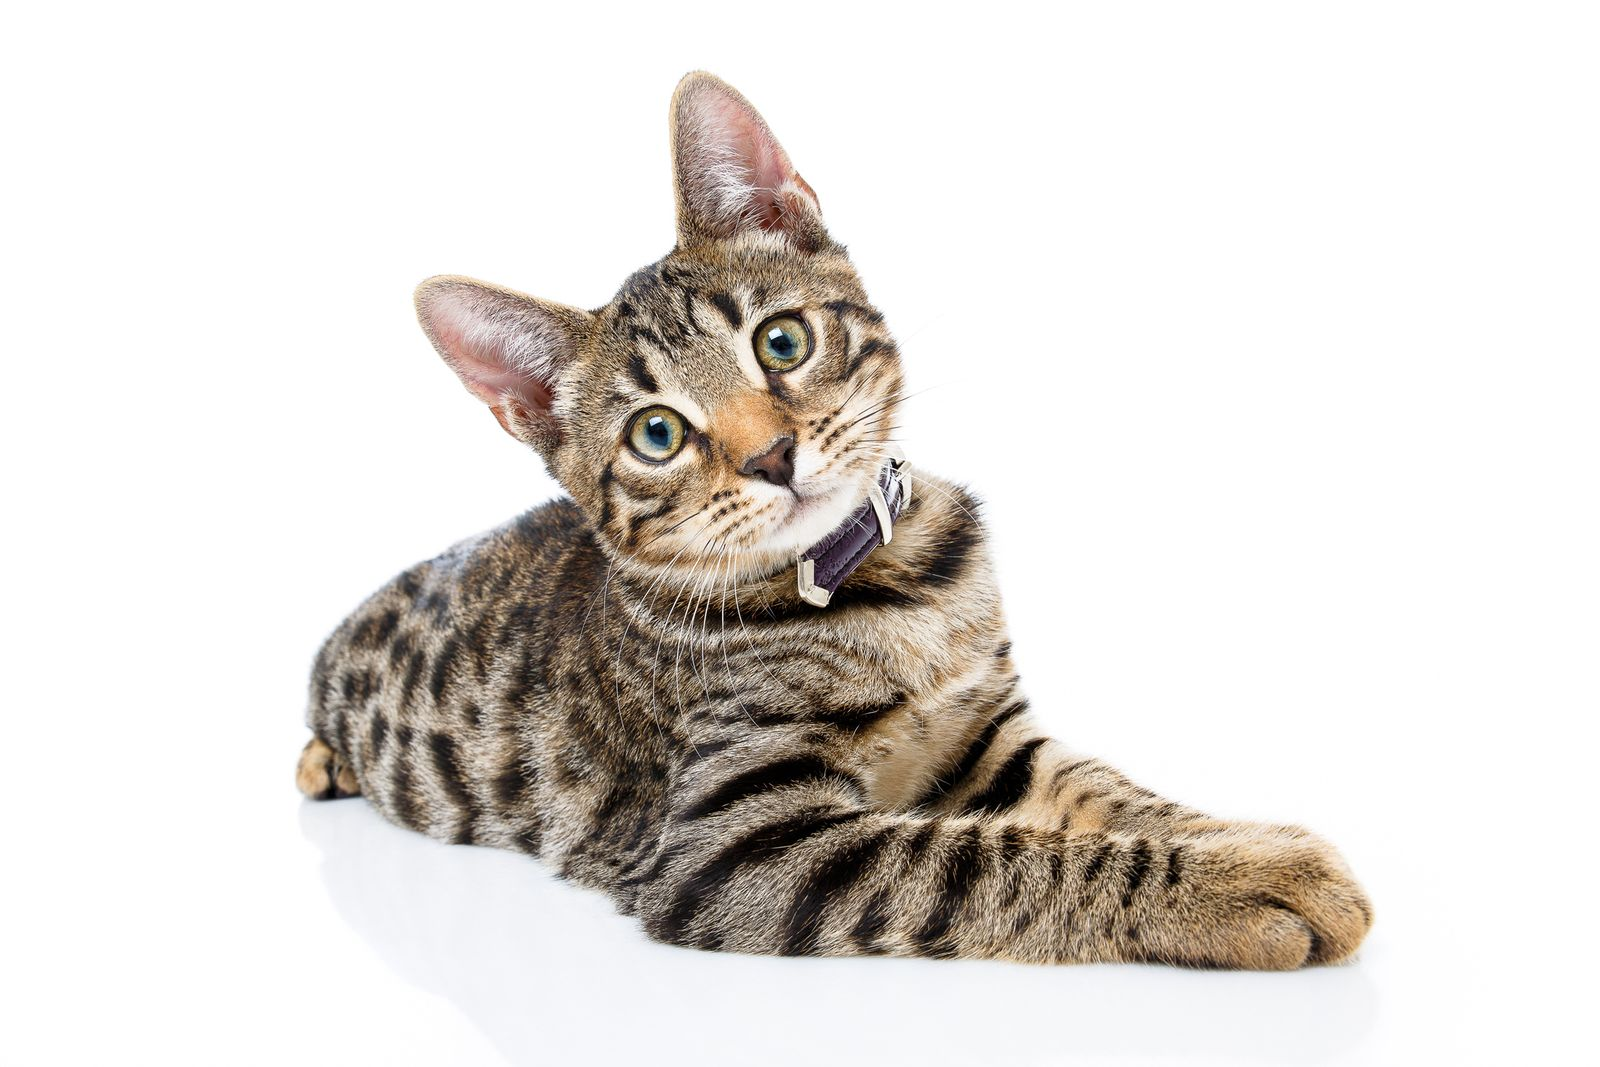

1/1 [==============================] - 0s 68ms/step
CAT


In [52]:
input_image_path = input('Path of image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_prediction_label = np.argmax(input_prediction)

if input_prediction_label == 1:
  print("CAT")
else:
  print("DOG")

Path of image to be predicted/content/dog.jpg


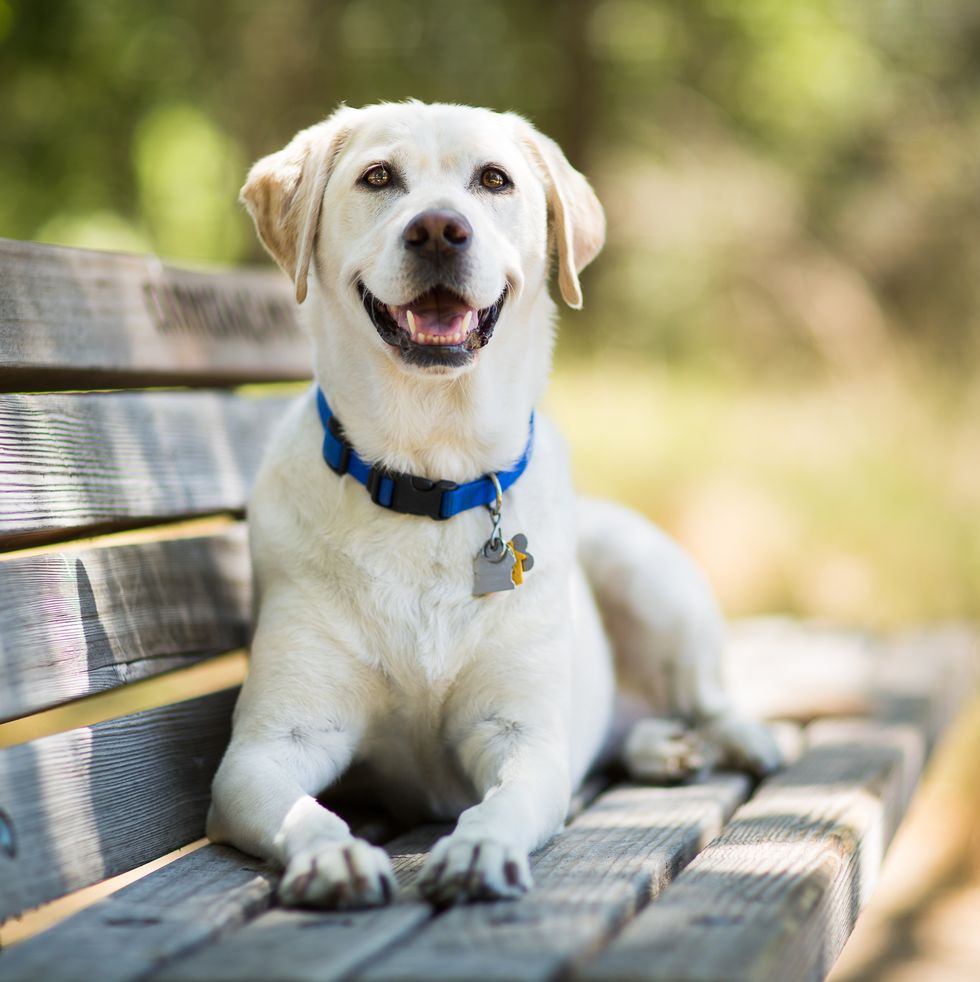

1/1 [==============================] - 0s 55ms/step
DOG


In [53]:
input_image_path = input('Path of image to be predicted')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image, (224,224))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])
input_prediction = model.predict(image_reshaped)
input_prediction_label = np.argmax(input_prediction)

if input_prediction_label == 1:
  print("CAT")
else:
  print("DOG")